### Project Title: Bankruptcy Prevention
### Business Objective: To predict whether a company will go bankrupt or not based on various risk and financial indicators.
### Type: Classification problem (binary target → bankruptcy / non-bankruptcy)

In [2]:
import pandas as pd
df = pd.read_excel("Bankruptcy (2).xlsx")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
df.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


In [4]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [5]:
df.shape

(250, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


# Data cleaning

In [7]:
df.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

In [8]:
df.isna().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

#### no null values 

In [9]:
df.duplicated().sum()

np.int64(147)

#### There are duplicates, but they are valid duplicates.

# EDA:Eploratory Data Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

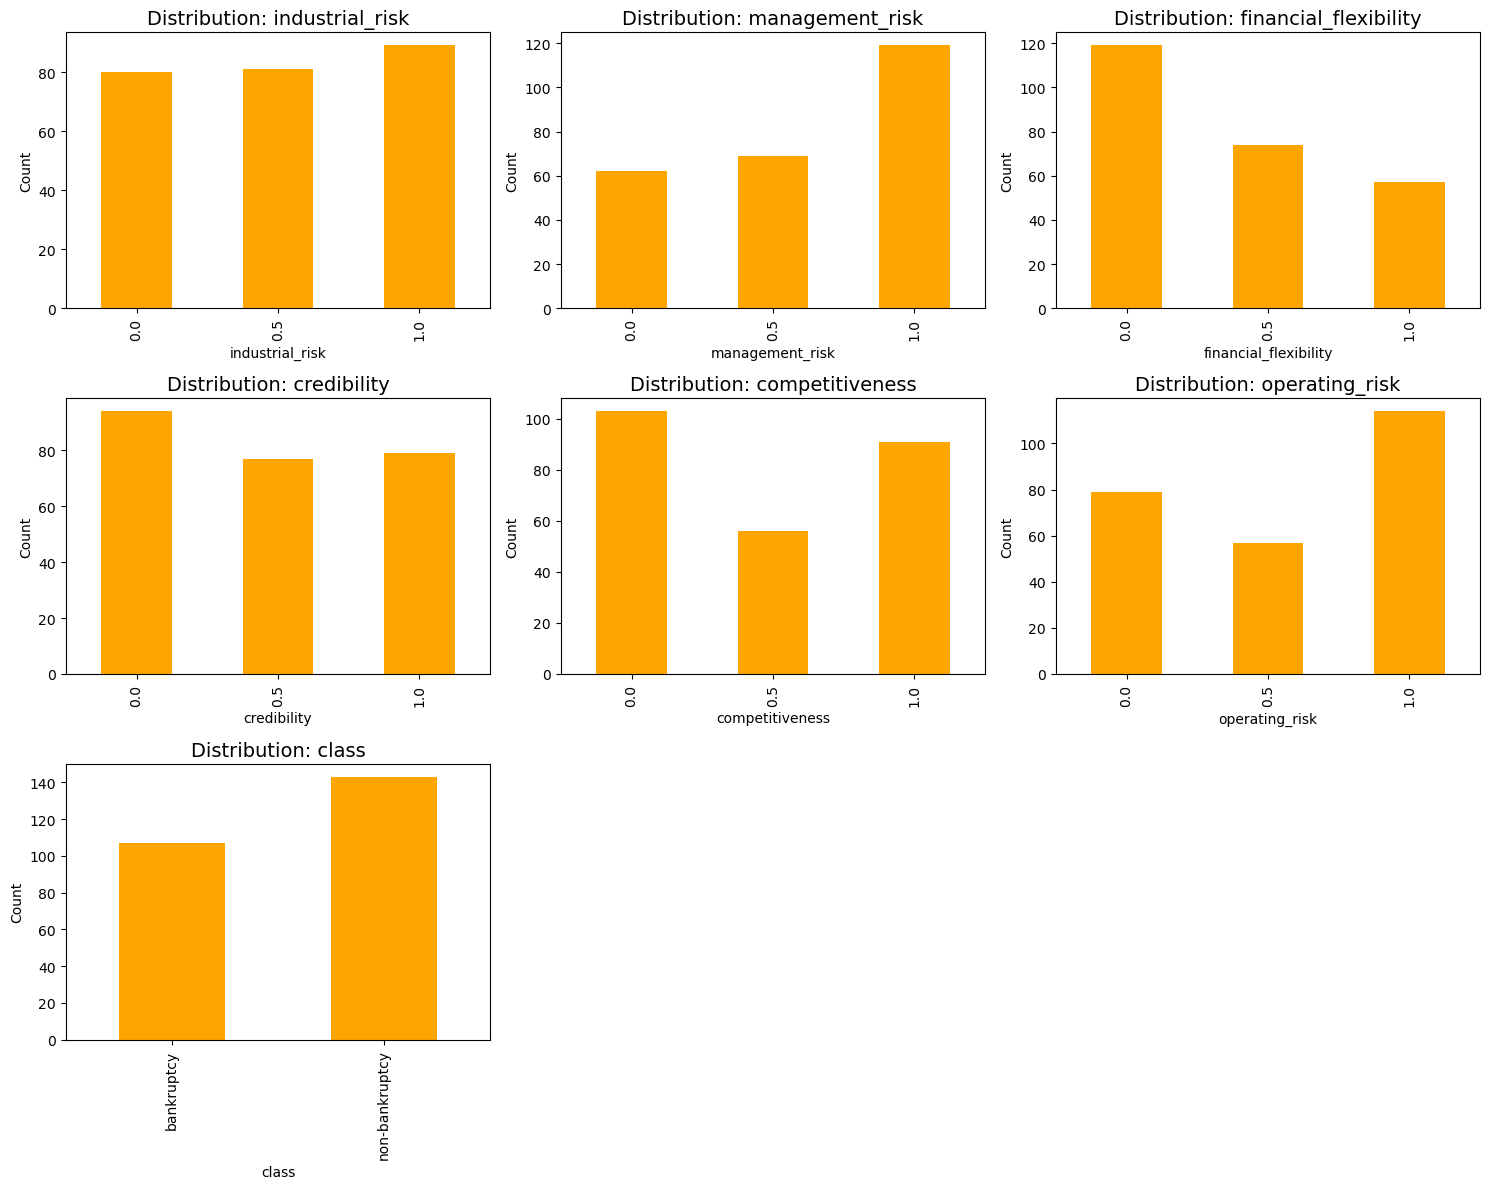

In [16]:
columns = df.columns

rows = (len(columns) // 3) + 1  
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(columns):
    plt.subplot(rows, 3, i + 1)
    df[col].value_counts().sort_index().plot(kind='bar', color='orange')
    plt.title(f"Distribution: {col}", fontsize=14)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.tight_layout()

plt.show()


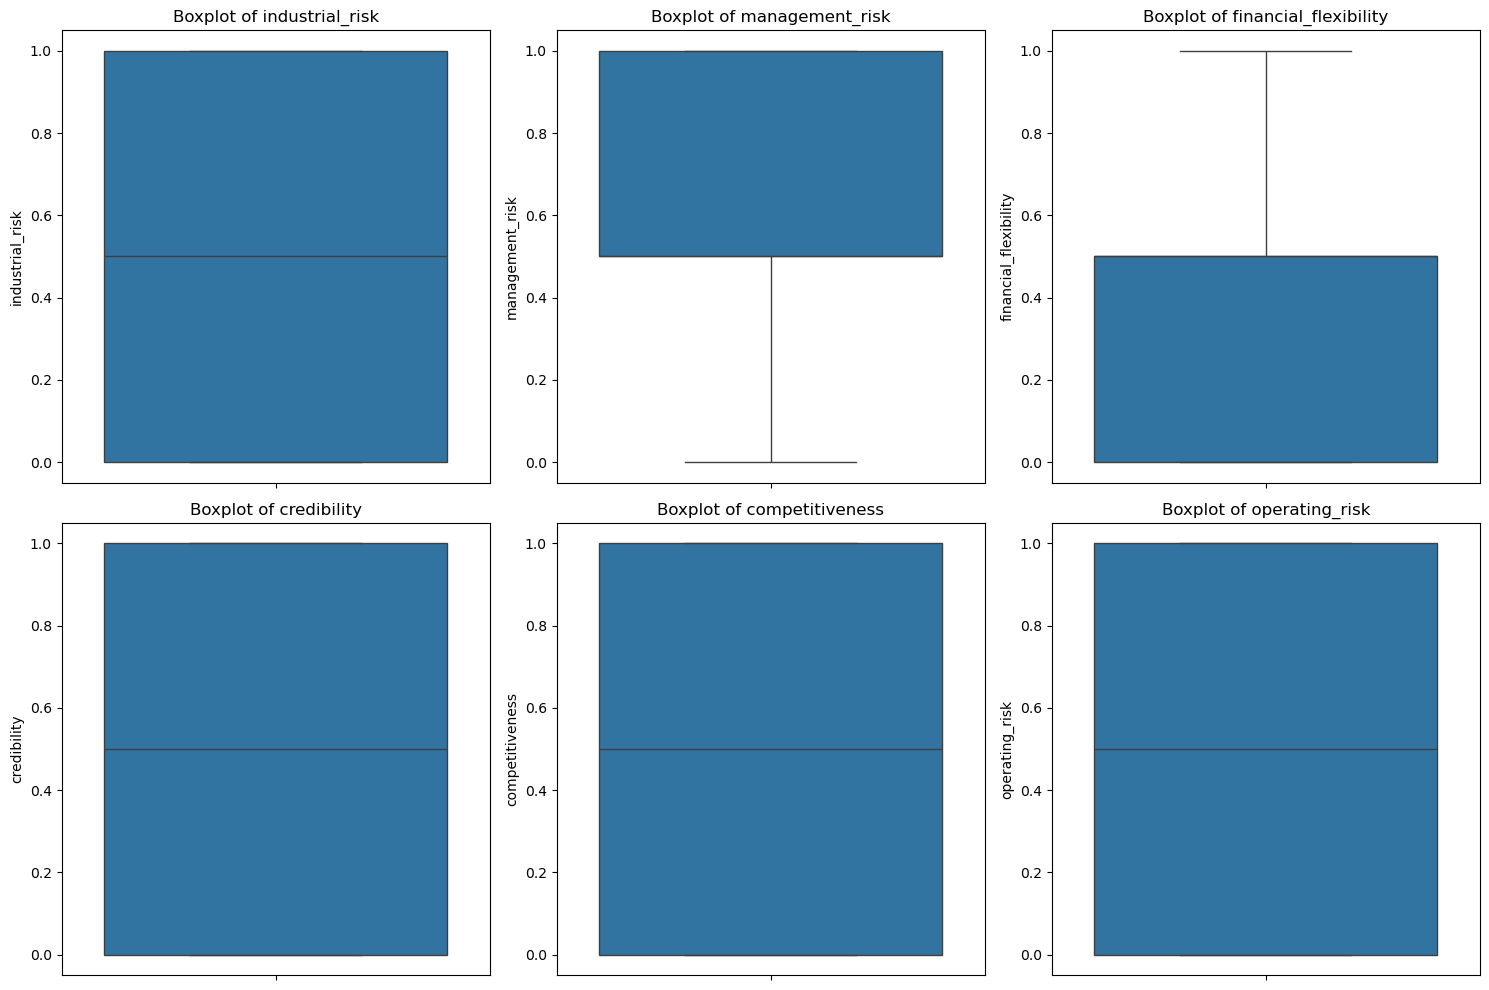

In [11]:
numerical_cols = ['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk',]

# Create a figure with 2 rows and 3 columns to fit all 6 plots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    # Use 2 rows and 3 columns (2,3,i+1) instead of (1,3,i+1)
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<Axes: >

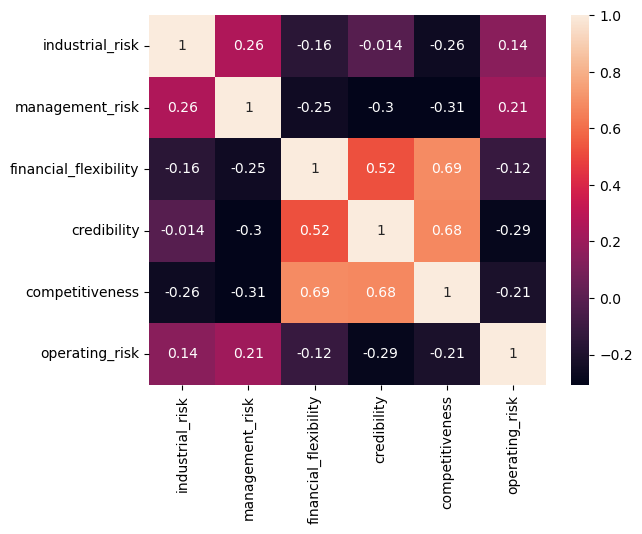

In [14]:
# First, let's check which columns are numeric and which are not
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation only on numeric columns
correlation = numeric_df.corr()

# Create heatmap with only numeric columns
sns.heatmap(correlation, annot=True)

# If you need to include the 'bankruptcy' column but it's categorical:
# You might need to convert it to numeric if it represents categories
# For example, if 'bankruptcy' is Yes/No:
# df['bankruptcy_numeric'] = df['bankruptcy'].map({'No': 0, 'Yes': 1})
# Then include it in your correlation analysis